Я выбрала этот датасет для анализа — https://www.kaggle.com/ashleshaprix/mall-customer-data. В нем данные о покупателях отдельно взятого торгового центра: их пол, возраст, годовой доход, баллы затрат.

In [140]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
buyers = pd.read_csv('Mall_Customers.csv').dropna()
buyers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Для начала посмотрим, как распределяются численные признаки в таблице — возраст (Age), 
годовой доход (Annual income)и баллы трат (Spending score). Для этого удобно использовать боксплоты.

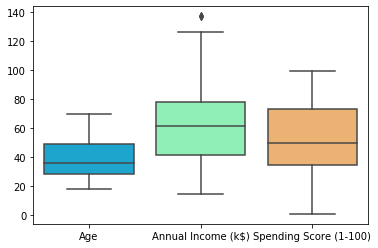

In [169]:
filtered_buyers = buyers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
sns.boxplot(data=filtered_buyers, palette='rainbow')

Теперь посмотрим, покупатели с каким доходом больше всего тратят в ТЦ. Для этого построим столбчатую диаграмму зависимости — как баллы трат (Spending score) зависят от годового дохода покупателя.
Интересно, что больше всего тратят в ТЦ люди с доходом ниже среднего.


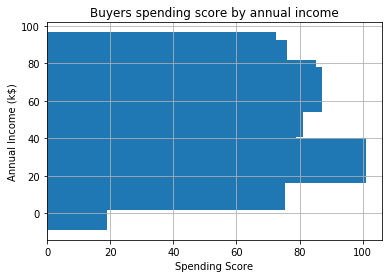

In [150]:
by_age = buyers.groupby('Age').mean().reset_index().sort_values('Spending Score (1-100)', ascending=False)
plt.barh(by_age['Spending Score (1-100)'], by_age['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score')
plt.title('Buyers spending score by annual income')
plt.grid()

Посмотрим, кто чаще шопится — мужчины или женщины. Это легко сделать с помощью каунтплота.

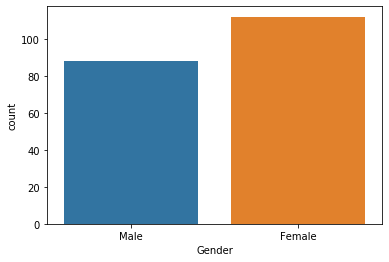

In [164]:
sns.countplot(x='Gender', data=buyers)

Теперь сравним доходы мужчин и женщин среди посетителей ТЦ. 
Для этого я выбрала гистограмму — на оси X располагается годовой доход, а на оси Y — количество покупателей 
с таким уровнем дохода.

По графику можно сделать вывод, что этот ТЦ чаще посещают люди со средним уровнем дохода.

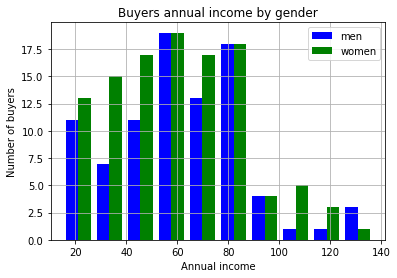

In [151]:
men = buyers[buyers['Gender']=='Male'].sort_values('Spending Score (1-100)', ascending=False)
women = buyers[buyers['Gender']=='Female'].sort_values('Spending Score (1-100)', ascending=False)

plt.hist([men['Annual Income (k$)'],women['Annual Income (k$)']], color = ['b','g'],label=['men','women'])
plt.title('Buyers annual income by gender')
plt.xlabel('Annual income')
plt.ylabel('Number of buyers')
plt.grid()
plt.legend()
plt.show()

Теперь посмотрим, есть ли прямая корелляция между возрастом покупателей (Age) и их годовым доходом (Annual income). Для этого  выбрала джойнтплот, который покажет совместное распределение этих признаков. 

Судя по графику, у них нет прямой зависимости :) Но точно можно сказать, что 100 тысяч в год получает примерно только треть посетителей, при этом это люди возраста 30-50 лет.

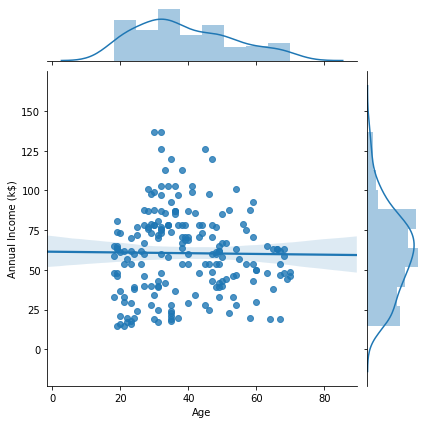

In [154]:
sns.jointplot(x='Age', y='Annual Income (k$)', 
              data=buyers, kind='reg')